<a href="https://colab.research.google.com/github/rishiimortal/Sentimental-analysis-using-ann/blob/main/ANN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense


Importing dataset

In [28]:
from tensorflow.keras.datasets import imdb

# Load IMDb dataset
vocab_size = 10000  # Limit the vocabulary size to 10,000 most frequent words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Display dataset shapes
print("Training set shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training set shape: (25000,)
Training labels shape: (25000,)
Test set shape: (25000,)
Test labels shape: (25000,)


In [29]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [30]:
print("Dataset size:", len(X))
print("Number of unique words:", len(np.unique(np.hstack(X))))

Dataset size: 50000
Number of unique words: 9998


In [31]:
review_lengths = [len(review) for review in X]
print("Minimum review length:", min(review_lengths))
print("Maximum review length:", max(review_lengths))
print("Average review length:", np.mean(review_lengths))

Minimum review length: 7
Maximum review length: 2494
Average review length: 234.75892


In [32]:
unique, counts = np.unique(y, return_counts=True)
sentiment_counts = dict(zip(unique, counts))
print("Sentiment distribution:", sentiment_counts)

Sentiment distribution: {0: 25000, 1: 25000}


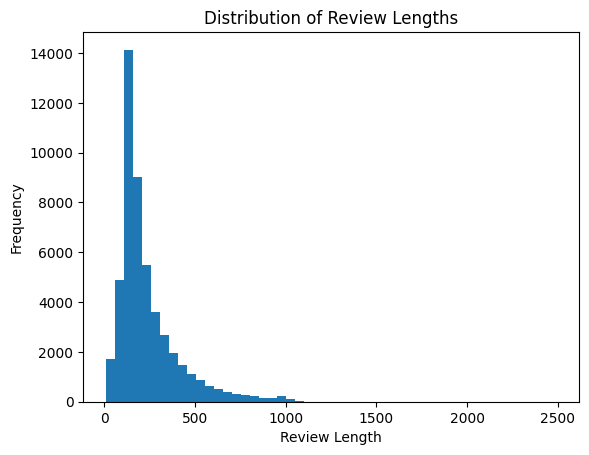

In [33]:
plt.hist(review_lengths, bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

Data cleaning




In [36]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [37]:

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove emails
    tokens = [word for word in tokens if '@' not in word]
    # Remove new line characters
    tokens = [word.replace('\n', '') for word in tokens]
    # Remove distracting single quotes
    tokens = [word.replace("'", "") for word in tokens]
    # Remove punctuation signs
    tokens = [word for word in tokens if word.isalnum()]
    # Lowercase all text
    tokens = [word.lower() for word in tokens]
    # Detokenize text
    cleaned_text = TreebankWordDetokenizer().detokenize(tokens)
    return cleaned_text

# Clean the reviews
def clean_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        cleaned_review = clean_text(review)
        cleaned_reviews.append(cleaned_review)
    return cleaned_reviews

# Example list of IMDb reviews
reviews = [
    "The movie was great! https://imdb.com #awesome",
    "I received an email at abc@example.com",
    "This is a\nnew line character.",
    "That's awesome!",
    "What's up? #Excited",
]

# Clean the reviews
cleaned_reviews = clean_reviews(reviews)

# Convert list of texts to Numpy array
cleaned_reviews_array = np.array(cleaned_reviews)

# Display cleaned reviews
print("Original Reviews:")
print(reviews)
print("\nCleaned Reviews:")
print(cleaned_reviews)
print("\nCleaned Reviews Array:")
print(cleaned_reviews_array)


Original Reviews:
['The movie was great! https://imdb.com #awesome', 'I received an email at abc@example.com', 'This is a\nnew line character.', "That's awesome!", "What's up? #Excited"]

Cleaned Reviews:
['the movie was great awesome', 'i received an email at abc', 'this is a new line character', 'that s awesome', 'what s up excited']

Cleaned Reviews Array:
['the movie was great awesome' 'i received an email at abc'
 'this is a new line character' 'that s awesome' 'what s up excited']


In [39]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb

# Load IMDb dataset
vocab_size = 10000  # Limit the vocabulary size to 10,000 most frequent words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Convert labels to numerical values
y_train_encoded = np.array([2 if label == 1 else 0 for label in y_train])
y_test_encoded = np.array([2 if label == 1 else 0 for label in y_test])

# Perform one-hot encoding
num_classes = 3  # Number of classes: Negative, Neutral, Positive
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

# Display shapes of encoded labels
print("Shape of y_train_one_hot:", y_train_one_hot.shape)
print("Shape of y_test_one_hot:", y_test_one_hot.shape)

# Display encoded labels for the first 5 examples
print("Encoded Labels for the First 5 Examples (Training Set):")
print(y_train_one_hot[:5])


Shape of y_train_one_hot: (25000, 3)
Shape of y_test_one_hot: (25000, 3)
Encoded Labels for the First 5 Examples (Training Set):
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define model parameters
embedding_dim = 128
lstm_units = 64

# Build the model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model_lstm.add(LSTM(units=lstm_units))
model_lstm.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
print(model_lstm.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

# Define model parameters
embedding_dim = 128
lstm_units = 64

# Build the model
model_bidirectional_lstm = Sequential()
model_bidirectional_lstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model_bidirectional_lstm.add(Bidirectional(LSTM(units=lstm_units)))
model_bidirectional_lstm.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_bidirectional_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
print(model_bidirectional_lstm.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable params: 1378945 (5.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Define model parameters
embedding_dim = 128
num_filters = 64
kernel_size = 5

# Build the model
model_conv1d = Sequential()
model_conv1d.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model_conv1d.add(Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'))
model_conv1d.add(GlobalMaxPooling1D())
model_conv1d.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_conv1d.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
print(model_conv1d.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 196, 64)           41024     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1321089 (5.04 MB)
Trainable params: 1321089 (5.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [46]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# Load IMDb dataset
vocab_size = 10000  # Limit the vocabulary size to 10,000 most frequent words
max_length = 200    # Limit the maximum length of reviews to 200 words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to a fixed length
X_train_padded = pad_sequences(X_train, maxlen=max_length, padding='pre', truncating='pre')
X_test_padded = pad_sequences(X_test, maxlen=max_length, padding='pre', truncating='pre')


In [ ]:
# Train and validate the single layer LSTM network
history_lstm = model_lstm.fit(X_train_padded, y_train, epochs=5, batch_size=128, validation_data=(X_test_padded, y_test))

# Train and validate the Bidirectional LSTM network
history_bidirectional_lstm = model_bidirectional_lstm.fit(X_train_padded, y_train, epochs=5, batch_size=128, validation_data=(X_test_padded, y_test))

# Train and validate the Convolutional 1D network
history_conv1d = model_conv1d.fit(X_train_padded, y_train, epochs=5, batch_size=128, validation_data=(X_test_padded, y_test))

# Plot history for each model
plot_history(history_lstm, 'Single Layer LSTM')
plot_history(history_bidirectional_lstm, 'Bidirectional LSTM')
plot_history(history_conv1d, 'Convolutional 1D')


Epoch 1/5
196/196 [==============================] - 122s 622ms/step - loss: 0.2352 - accuracy: 0.9072 - val_loss: 0.3070 - val_accuracy: 0.8716
Epoch 2/5
196/196 [==============================] - 121s 620ms/step - loss: 0.1706 - accuracy: 0.9363 - val_loss: 0.3792 - val_accuracy: 0.8616
Epoch 3/5
196/196 [==============================] - 122s 621ms/step - loss: 0.1203 - accuracy: 0.9565 - val_loss: 0.4250 - val_accuracy: 0.8581
Epoch 4/5
129/196 [==================>...........] - ETA: 27s - loss: 0.0985 - accuracy: 0.9652

In [3]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Load IMDb dataset with the most common 10,000 words
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Preprocess the sequences
max_length = 200
X_train_padded = pad_sequences(X_train, maxlen=max_length)
X_test_padded = pad_sequences(X_test, maxlen=max_length)

# Define model architecture
embedding_dim = 128
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=128, validation_data=(X_test_padded, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


17464789/17464789 [==============================] - 1s 0us/step
Epoch 1/5
196/196 [==============================] - 19s 92ms/step - loss: 0.4561 - accuracy: 0.7574 - val_loss: 0.3024 - val_accuracy: 0.8704
Epoch 2/5
196/196 [==============================] - 22s 111ms/step - loss: 0.1041 - accuracy: 0.9640 - val_loss: 0.3737 - val_accuracy: 0.8520
Epoch 3/5
196/196 [==============================] - 18s 91ms/step - loss: 0.0127 - accuracy: 0.9985 - val_loss: 0.4075 - val_accuracy: 0.8645
Epoch 4/5
196/196 [==============================] - 19s 97ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4335 - val_accuracy: 0.8670
Epoch 5/5
782/782 [==============================] - 6s 7ms/step - loss: 0.4524 - accuracy: 0.8667
Test Loss: 0.45242127776145935
Test Accuracy: 0.8667200207710266
